Numerically solve the non-linear pendulum differential equation:
$\frac{d^2\theta}{dt^2} + \frac{c}{m}\frac{d\theta}{dt} + \frac{g}{L}\sin(\theta) = 0$

Transform second-order equation into a system of first-order differential equations.
Let $w = \frac{d\theta}{dt}$. The system is:

$\begin{cases}
    w = \frac{d\theta}{dt}\\
    \frac{dw}{dt} = - \frac{c}{m}w - \frac{g}{L}\sin(\theta)\\
\end{cases}$


In [99]:
#Initialize
import math
import matplotlib.pyplot as pyp
simulation_duration = 18 #in seconds
step_size = 0.001 #in seconds

initial_angle = math.pi/2 #in rads
initial_velocity = 0 #in rad/s

dampening_coefficient = .16 #in Ns/m
mass = .5 #in kg
length = 1.2 #in meters
g = 9.81 #(m/s^2)

In [100]:
cBym = dampening_coefficient/mass #precompute ratios
gByL = g/length 
number_of_steps = int(simulation_duration/step_size)
rad2deg = 180/math.pi

time_vector = [0] * (number_of_steps+1)
angle_vector = [0] * (number_of_steps+1)
velocity_vector = [0] * (number_of_steps+1)

def EulerMethod(nSteps, stepSize, IV1, IV2, const1, const2, time, angle, velocity):
    i = 0
    time[0] = 0
    angle[0] = IV1
    velocity[0] = IV2

    dwdt = lambda w, theta: -const1*w - const2*math.sin(theta)

    while i < nSteps:
        time[i+1] = time[i] + stepSize
        angle[i+1] = angle[i] + stepSize*velocity[i]
        velocity[i+1] = velocity[i] + stepSize*dwdt(velocity[i], angle[i])
        i = i + 1

In [101]:
EulerMethod(number_of_steps, step_size, initial_angle, initial_velocity, cBym, gByL, time_vector, angle_vector, velocity_vector)

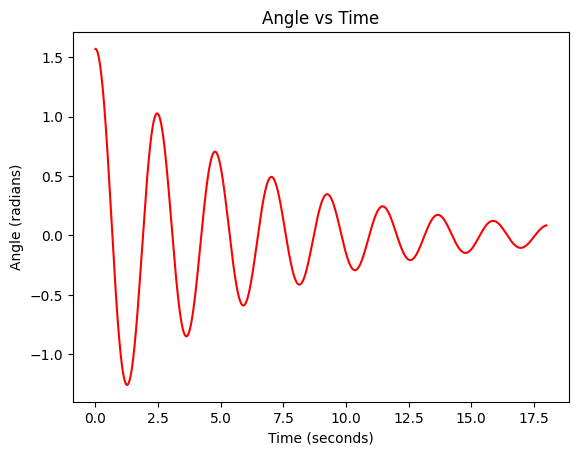

In [102]:
x = time_vector
y = angle_vector

pyp.title("Angle vs Time")
pyp.xlabel("Time (seconds)")
pyp.ylabel("Angle (radians)")
pyp.plot(x, y, color = "red")
pyp.show()